In [1]:
import numpy as np
import pandas as pd

from sklearn import manifold
import matplotlib.pyplot as plt
import matplotlib 

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.cluster import SpectralClustering

import datetime
from datetime import timedelta

import utils

In [2]:
df_MR = pd.read_csv("./Data/dfTFMFinalv6.csv", low_memory=False)

df_MR = utils.buildSampledDataframes(df_MR)

df_both = pd.read_csv("./Data/df.csv")
df_both = df_both.drop(['DaysOfStay'], axis=1)

df_MR = df_MR.drop(columns=['MR'], axis=1)
group = pd.merge(df_both, df_MR, on=['Admissiondboid'], how="left")

print("Nº of patient: ", group.shape[0]/7)
print("\tAMR: ", group[group['MR'] == 1].shape[0]/7)
print("\t\tAMR<48h: ", group[(group['MR'] == 1) & (group['days_to_culture'] <= 48)].shape[0]/7)
print("\t\tAMR>48h: ", group[(group['MR'] == 1) & (group['days_to_culture'] > 48)].shape[0]/7)
print("\tNon-AMR: ", group[group['MR'] == 0].shape[0]/7)

Nº of patient:  3310.0
	AMR:  597.0
		AMR<48h:  255.0
		AMR>48h:  342.0
	Non-AMR:  2713.0


## FE + AE

### Train set 0

==================================>S1<=====================================
(842, 140)
(842, 1)


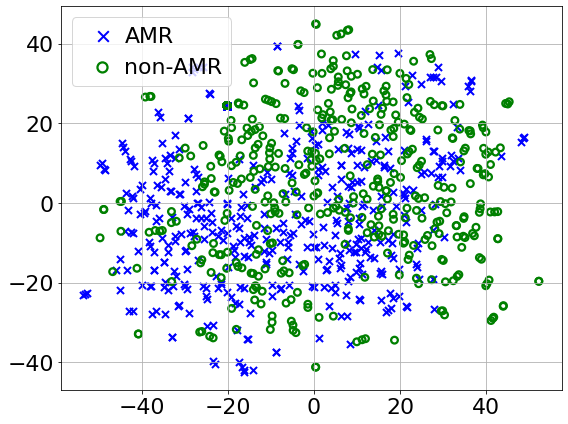

In [3]:
carpetas = ["S1", "S2", "S3", "S4", "S5"]
method = "AE"
analysis_method = "FE"

more_analysis = False

##### Select the set of data to analyze
i = 0

print("==================================>" + carpetas[i] + "<=====================================")
####### begin load data
y_train = pd.read_csv('./Data/labels/' + carpetas[i] + '/y_train.csv')
X_train = pd.read_csv('./Data/' + analysis_method + '/' + method + '/X_train_' + carpetas[i] + '.csv')

print(X_train.shape)
print(y_train.shape)
#### end load data

###### begin df_TSNE
df_TSNE = utils.plotTSNE(X_train, y_train, 20)
# get admissiondboid
df_TSNE = utils.add_Adb(df_TSNE, carpetas[i])
##### end df_TSNE

if more_analysis:
    ##### CVIs to get the number of clusters
    results = utils.f_davies_bouldin_score(df_TSNE, X_train)
    number_of_clusters_DB = min(results, key=results.get)

    results = utils.f_silhouette_score(df_TSNE, X_train)
    number_of_clusters_SC = max(results, key=results.get)

    if number_of_clusters_DB == number_of_clusters_SC:
        n_cluster = number_of_clusters_SC
    else:
        print("=======> Number of different clusters")

    ##### end CVIs

    ##### add labels to TSNE
    df_TSNE_with_sc_labels = utils.f_sc(df_TSNE, X_train, n_cluster)
    ##### number of unique labels
    num_labels = len(np.unique(df_TSNE_with_sc_labels.labels))

    ###### begin cluster analysis
    for i in range(num_labels):
        print(" <============ Cluster analysis ============>")
        utils.analysisCluster(df_TSNE_with_sc_labels, i, group)
    # ###### end cluster analysis

### Train set 1

==================================>S2<=====================================
(852, 140)
(852, 1)


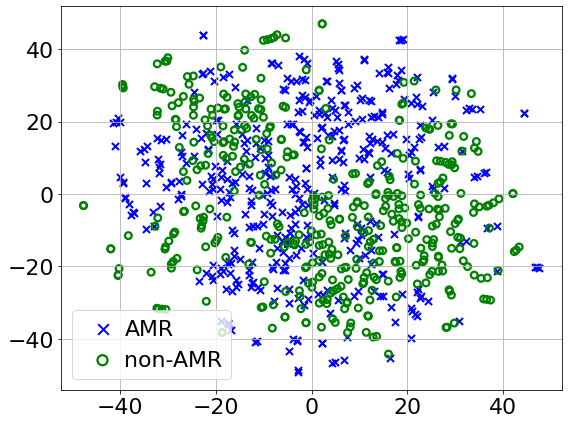

In [4]:
carpetas = ["S1", "S2", "S3", "S4", "S5"]
method = "AE"
analysis_method = "FE"

more_analysis = False

##### Select the set of data to analyze
i = 1

print("==================================>" + carpetas[i] + "<=====================================")
####### begin load data
y_train = pd.read_csv('./Data/labels/' + carpetas[i] + '/y_train.csv')
X_train = pd.read_csv('./Data/' + analysis_method + '/' + method + '/X_train_' + carpetas[i] + '.csv')

print(X_train.shape)
print(y_train.shape)
#### end load data

###### begin df_TSNE
df_TSNE = utils.plotTSNE(X_train, y_train, 20)
# get admissiondboid
df_TSNE = utils.add_Adb(df_TSNE, carpetas[i])
##### end df_TSNE

if more_analysis:
    ##### CVIs to get the number of clusters
    results = utils.f_davies_bouldin_score(df_TSNE, X_train)
    number_of_clusters_DB = min(results, key=results.get)

    results = utils.f_silhouette_score(df_TSNE, X_train)
    number_of_clusters_SC = max(results, key=results.get)

    if number_of_clusters_DB == number_of_clusters_SC:
        n_cluster = number_of_clusters_SC
    else:
        print("=======> Number of different clusters")

    ##### end CVIs

    ##### add labels to TSNE
    df_TSNE_with_sc_labels = utils.f_sc(df_TSNE, X_train, n_cluster)
    ##### number of unique labels
    num_labels = len(np.unique(df_TSNE_with_sc_labels.labels))

    ###### begin cluster analysis
    for i in range(num_labels):
        print(" <============ Cluster analysis ============>")
        utils.analysisCluster(df_TSNE_with_sc_labels, i, group)
    # ###### end cluster analysis

### Train set 2

==================================>S3<=====================================
(856, 135)
(856, 1)


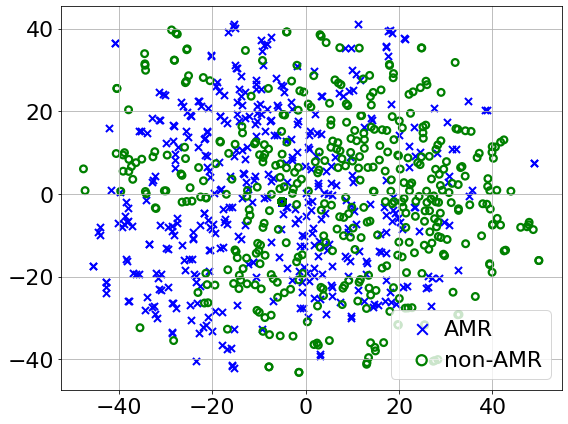

In [5]:
carpetas = ["S1", "S2", "S3", "S4", "S5"]
method = "AE"
analysis_method = "FE"

more_analysis = False

##### Select the set of data to analyze
i = 2

print("==================================>" + carpetas[i] + "<=====================================")
####### begin load data
y_train = pd.read_csv('./Data/labels/' + carpetas[i] + '/y_train.csv')
X_train = pd.read_csv('./Data/' + analysis_method + '/' + method + '/X_train_' + carpetas[i] + '.csv')

print(X_train.shape)
print(y_train.shape)
#### end load data

###### begin df_TSNE
df_TSNE = utils.plotTSNE(X_train, y_train, 20)
# get admissiondboid
df_TSNE = utils.add_Adb(df_TSNE, carpetas[i])
##### end df_TSNE

if more_analysis:
    ##### CVIs to get the number of clusters
    results = utils.f_davies_bouldin_score(df_TSNE, X_train)
    number_of_clusters_DB = min(results, key=results.get)

    results = utils.f_silhouette_score(df_TSNE, X_train)
    number_of_clusters_SC = max(results, key=results.get)

    if number_of_clusters_DB == number_of_clusters_SC:
        n_cluster = number_of_clusters_SC
    else:
        print("=======> Number of different clusters")

    ##### end CVIs

    ##### add labels to TSNE
    df_TSNE_with_sc_labels = utils.f_sc(df_TSNE, X_train, n_cluster)
    ##### number of unique labels
    num_labels = len(np.unique(df_TSNE_with_sc_labels.labels))

    ###### begin cluster analysis
    for i in range(num_labels):
        print(" <============ Cluster analysis ============>")
        utils.analysisCluster(df_TSNE_with_sc_labels, i, group)
    # ###### end cluster analysis

### Train set 3

==================================>S4<=====================================
(866, 135)
(866, 1)


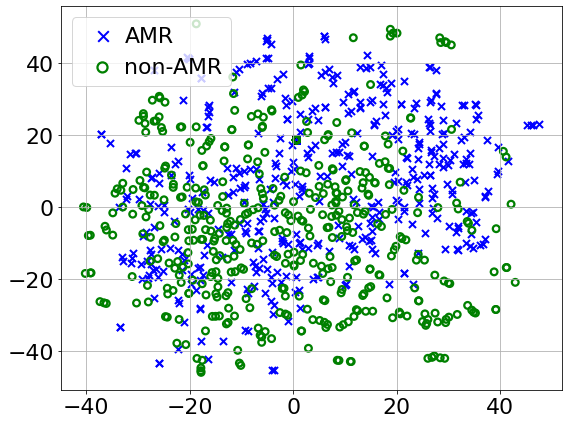

In [6]:
carpetas = ["S1", "S2", "S3", "S4", "S5"]
method = "AE"
analysis_method = "FE"

more_analysis = False

##### Select the set of data to analyze
i = 3

print("==================================>" + carpetas[i] + "<=====================================")
####### begin load data
y_train = pd.read_csv('./Data/labels/' + carpetas[i] + '/y_train.csv')
X_train = pd.read_csv('./Data/' + analysis_method + '/' + method + '/X_train_' + carpetas[i] + '.csv')

print(X_train.shape)
print(y_train.shape)
#### end load data

###### begin df_TSNE
df_TSNE = utils.plotTSNE(X_train, y_train, 20)
# get admissiondboid
df_TSNE = utils.add_Adb(df_TSNE, carpetas[i])
##### end df_TSNE

if more_analysis:
    ##### CVIs to get the number of clusters
    results = utils.f_davies_bouldin_score(df_TSNE, X_train)
    number_of_clusters_DB = min(results, key=results.get)

    results = utils.f_silhouette_score(df_TSNE, X_train)
    number_of_clusters_SC = max(results, key=results.get)

    if number_of_clusters_DB == number_of_clusters_SC:
        n_cluster = number_of_clusters_SC
    else:
        print("=======> Number of different clusters")

    ##### end CVIs

    ##### add labels to TSNE
    df_TSNE_with_sc_labels = utils.f_sc(df_TSNE, X_train, n_cluster)
    ##### number of unique labels
    num_labels = len(np.unique(df_TSNE_with_sc_labels.labels))

    ###### begin cluster analysis
    for i in range(num_labels):
        print(" <============ Cluster analysis ============>")
        utils.analysisCluster(df_TSNE_with_sc_labels, i, group)
    # ###### end cluster analysis

### Train set 4

==================================>S5<=====================================
(846, 140)
(846, 1)


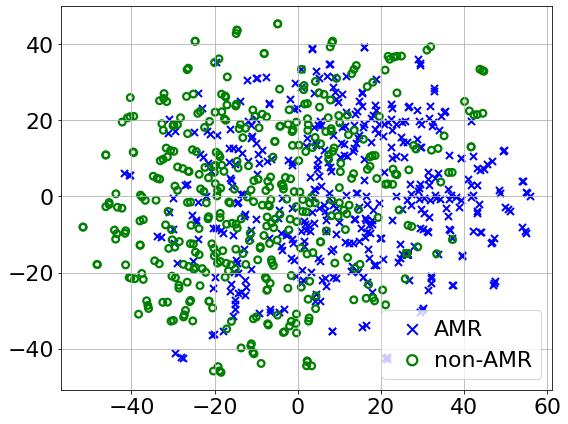

In [7]:
carpetas = ["S1", "S2", "S3", "S4", "S5"]
method = "AE"
analysis_method = "FE"

more_analysis = False

##### Select the set of data to analyze
i = 4

print("==================================>" + carpetas[i] + "<=====================================")
####### begin load data
y_train = pd.read_csv('./Data/labels/' + carpetas[i] + '/y_train.csv')
X_train = pd.read_csv('./Data/' + analysis_method + '/' + method + '/X_train_' + carpetas[i] + '.csv')

print(X_train.shape)
print(y_train.shape)
#### end load data

###### begin df_TSNE
df_TSNE = utils.plotTSNE(X_train, y_train, 20)
# get admissiondboid
df_TSNE = utils.add_Adb(df_TSNE, carpetas[i])
##### end df_TSNE

if more_analysis:
    ##### CVIs to get the number of clusters
    results = utils.f_davies_bouldin_score(df_TSNE, X_train)
    number_of_clusters_DB = min(results, key=results.get)

    results = utils.f_silhouette_score(df_TSNE, X_train)
    number_of_clusters_SC = max(results, key=results.get)

    if number_of_clusters_DB == number_of_clusters_SC:
        n_cluster = number_of_clusters_SC
    else:
        print("=======> Number of different clusters")

    ##### end CVIs

    ##### add labels to TSNE
    df_TSNE_with_sc_labels = utils.f_sc(df_TSNE, X_train, n_cluster)
    ##### number of unique labels
    num_labels = len(np.unique(df_TSNE_with_sc_labels.labels))

    ###### begin cluster analysis
    for i in range(num_labels):
        print(" <============ Cluster analysis ============>")
        utils.analysisCluster(df_TSNE_with_sc_labels, i, group)
    # ###### end cluster analysis

## TCK + DAE

### Train set 0

==================================>S1<=====================================
(842, 135)
(842, 1)


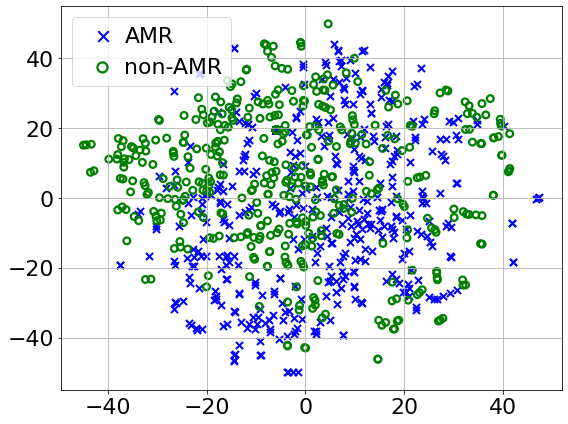

In [8]:
carpetas = ["S1", "S2", "S3", "S4", "S5"]
method = "DAE"
analysis_method = "FE"

more_analysis = False

##### Select the set of data to analyze
i = 0

print("==================================>" + carpetas[i] + "<=====================================")
####### begin load data
y_train = pd.read_csv('./Data/labels/' + carpetas[i] + '/y_train.csv')
X_train = pd.read_csv('./Data/' + analysis_method + '/' + method + '/X_train_' + carpetas[i] + '.csv')

print(X_train.shape)
print(y_train.shape)
#### end load data

###### begin df_TSNE
df_TSNE = utils.plotTSNE(X_train, y_train, 20)
# get admissiondboid
df_TSNE = utils.add_Adb(df_TSNE, carpetas[i])
##### end df_TSNE

if more_analysis:
    ##### CVIs to get the number of clusters
    results = utils.f_davies_bouldin_score(df_TSNE, X_train)
    number_of_clusters_DB = min(results, key=results.get)

    results = utils.f_silhouette_score(df_TSNE, X_train)
    number_of_clusters_SC = max(results, key=results.get)

    if number_of_clusters_DB == number_of_clusters_SC:
        n_cluster = number_of_clusters_SC
    else:
        print("=======> Number of different clusters")

    ##### end CVIs

    ##### add labels to TSNE
    df_TSNE_with_sc_labels = utils.f_sc(df_TSNE, X_train, n_cluster)
    ##### number of unique labels
    num_labels = len(np.unique(df_TSNE_with_sc_labels.labels))

    ###### begin cluster analysis
    for i in range(num_labels):
        print(" <============ Cluster analysis ============>")
        utils.analysisCluster(df_TSNE_with_sc_labels, i, group)
    # ###### end cluster analysis

### Train set 1

==================================>S2<=====================================
(852, 140)
(852, 1)


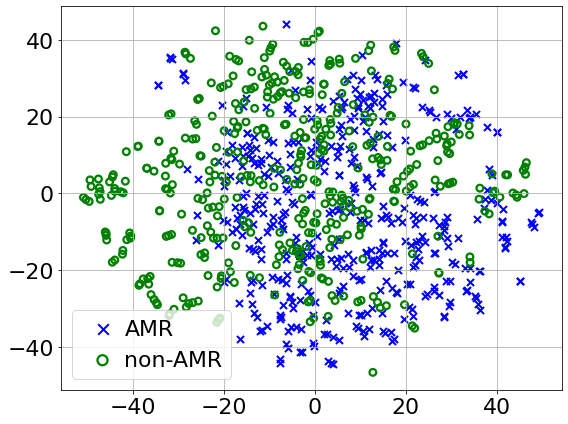

In [9]:
carpetas = ["S1", "S2", "S3", "S4", "S5"]
method = "DAE"
analysis_method = "FE"

more_analysis = False

##### Select the set of data to analyze
i = 1

print("==================================>" + carpetas[i] + "<=====================================")
####### begin load data
y_train = pd.read_csv('./Data/labels/' + carpetas[i] + '/y_train.csv')
X_train = pd.read_csv('./Data/' + analysis_method + '/' + method + '/X_train_' + carpetas[i] + '.csv')

print(X_train.shape)
print(y_train.shape)
#### end load data

###### begin df_TSNE
df_TSNE = utils.plotTSNE(X_train, y_train, 20)
# get admissiondboid
df_TSNE = utils.add_Adb(df_TSNE, carpetas[i])
##### end df_TSNE

if more_analysis:
    ##### CVIs to get the number of clusters
    results = utils.f_davies_bouldin_score(df_TSNE, X_train)
    number_of_clusters_DB = min(results, key=results.get)

    results = utils.f_silhouette_score(df_TSNE, X_train)
    number_of_clusters_SC = max(results, key=results.get)

    if number_of_clusters_DB == number_of_clusters_SC:
        n_cluster = number_of_clusters_SC
    else:
        print("=======> Number of different clusters")

    ##### end CVIs

    ##### add labels to TSNE
    df_TSNE_with_sc_labels = utils.f_sc(df_TSNE, X_train, n_cluster)
    ##### number of unique labels
    num_labels = len(np.unique(df_TSNE_with_sc_labels.labels))

    ###### begin cluster analysis
    for i in range(num_labels):
        print(" <============ Cluster analysis ============>")
        utils.analysisCluster(df_TSNE_with_sc_labels, i, group)
    # ###### end cluster analysis

### Train set 2

==================================>S3<=====================================
(856, 125)
(856, 1)


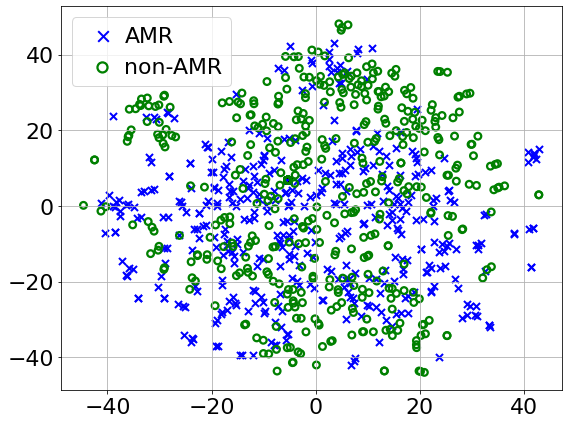

In [10]:
carpetas = ["S1", "S2", "S3", "S4", "S5"]
method = "DAE"
analysis_method = "FE"

more_analysis = False

##### Select the set of data to analyze
i = 2

print("==================================>" + carpetas[i] + "<=====================================")
####### begin load data
y_train = pd.read_csv('./Data/labels/' + carpetas[i] + '/y_train.csv')
X_train = pd.read_csv('./Data/' + analysis_method + '/' + method + '/X_train_' + carpetas[i] + '.csv')

print(X_train.shape)
print(y_train.shape)
#### end load data

###### begin df_TSNE
df_TSNE = utils.plotTSNE(X_train, y_train, 20)
# get admissiondboid
df_TSNE = utils.add_Adb(df_TSNE, carpetas[i])
##### end df_TSNE

if more_analysis:
    ##### CVIs to get the number of clusters
    results = utils.f_davies_bouldin_score(df_TSNE, X_train)
    number_of_clusters_DB = min(results, key=results.get)

    results = utils.f_silhouette_score(df_TSNE, X_train)
    number_of_clusters_SC = max(results, key=results.get)

    if number_of_clusters_DB == number_of_clusters_SC:
        n_cluster = number_of_clusters_SC
    else:
        print("=======> Number of different clusters")

    ##### end CVIs

    ##### add labels to TSNE
    df_TSNE_with_sc_labels = utils.f_sc(df_TSNE, X_train, n_cluster)
    ##### number of unique labels
    num_labels = len(np.unique(df_TSNE_with_sc_labels.labels))

    ###### begin cluster analysis
    for i in range(num_labels):
        print(" <============ Cluster analysis ============>")
        utils.analysisCluster(df_TSNE_with_sc_labels, i, group)
    # ###### end cluster analysis

### Train set 3

==================================>S4<=====================================
(866, 125)
(866, 1)


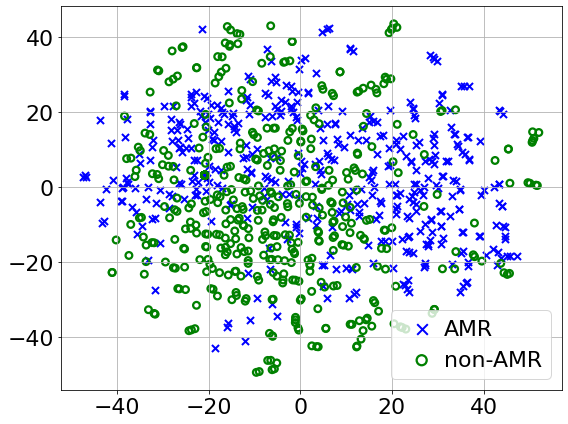

In [11]:
carpetas = ["S1", "S2", "S3", "S4", "S5"]
method = "DAE"
analysis_method = "FE"

more_analysis = False

##### Select the set of data to analyze
i = 3

print("==================================>" + carpetas[i] + "<=====================================")
####### begin load data
y_train = pd.read_csv('./Data/labels/' + carpetas[i] + '/y_train.csv')
X_train = pd.read_csv('./Data/' + analysis_method + '/' + method + '/X_train_' + carpetas[i] + '.csv')

print(X_train.shape)
print(y_train.shape)
#### end load data

###### begin df_TSNE
df_TSNE = utils.plotTSNE(X_train, y_train, 20)
# get admissiondboid
df_TSNE = utils.add_Adb(df_TSNE, carpetas[i])
##### end df_TSNE

if more_analysis:
    ##### CVIs to get the number of clusters
    results = utils.f_davies_bouldin_score(df_TSNE, X_train)
    number_of_clusters_DB = min(results, key=results.get)

    results = utils.f_silhouette_score(df_TSNE, X_train)
    number_of_clusters_SC = max(results, key=results.get)

    if number_of_clusters_DB == number_of_clusters_SC:
        n_cluster = number_of_clusters_SC
    else:
        print("=======> Number of different clusters")

    ##### end CVIs

    ##### add labels to TSNE
    df_TSNE_with_sc_labels = utils.f_sc(df_TSNE, X_train, n_cluster)
    ##### number of unique labels
    num_labels = len(np.unique(df_TSNE_with_sc_labels.labels))

    ###### begin cluster analysis
    for i in range(num_labels):
        print(" <============ Cluster analysis ============>")
        utils.analysisCluster(df_TSNE_with_sc_labels, i, group)
    # ###### end cluster analysis

### Train set 4

==================================>S5<=====================================
(846, 140)
(846, 1)


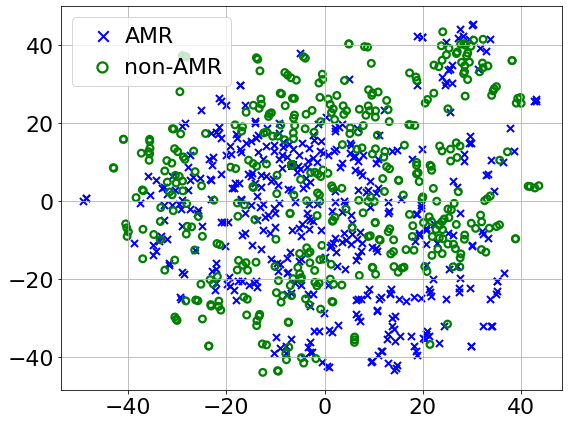

In [12]:
carpetas = ["S1", "S2", "S3", "S4", "S5"]
method = "DAE"
analysis_method = "FE"

more_analysis = False

##### Select the set of data to analyze
i = 4

print("==================================>" + carpetas[i] + "<=====================================")
####### begin load data
y_train = pd.read_csv('./Data/labels/' + carpetas[i] + '/y_train.csv')
X_train = pd.read_csv('./Data/' + analysis_method + '/' + method + '/X_train_' + carpetas[i] + '.csv')

print(X_train.shape)
print(y_train.shape)
#### end load data

###### begin df_TSNE
df_TSNE = utils.plotTSNE(X_train, y_train, 20)
# get admissiondboid
df_TSNE = utils.add_Adb(df_TSNE, carpetas[i])
##### end df_TSNE

if more_analysis:
    ##### CVIs to get the number of clusters
    results = utils.f_davies_bouldin_score(df_TSNE, X_train)
    number_of_clusters_DB = min(results, key=results.get)

    results = utils.f_silhouette_score(df_TSNE, X_train)
    number_of_clusters_SC = max(results, key=results.get)

    if number_of_clusters_DB == number_of_clusters_SC:
        n_cluster = number_of_clusters_SC
    else:
        print("=======> Number of different clusters")

    ##### end CVIs

    ##### add labels to TSNE
    df_TSNE_with_sc_labels = utils.f_sc(df_TSNE, X_train, n_cluster)
    ##### number of unique labels
    num_labels = len(np.unique(df_TSNE_with_sc_labels.labels))

    ###### begin cluster analysis
    for i in range(num_labels):
        print(" <============ Cluster analysis ============>")
        utils.analysisCluster(df_TSNE_with_sc_labels, i, group)
    # ###### end cluster analysis

## TCK + PCA

### Train set 0

==================================>S1<=====================================
(842, 86)
(842, 1)


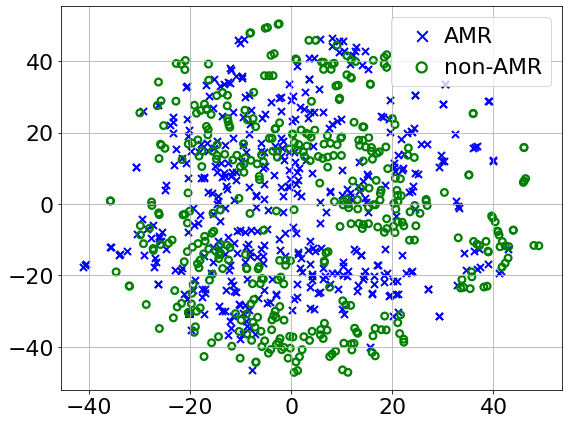

In [13]:
carpetas = ["S1", "S2", "S3", "S4", "S5"]
method = "PCA"
analysis_method = "FE"

more_analysis = False

##### Select the set of data to analyze
i = 0

print("==================================>" + carpetas[i] + "<=====================================")
####### begin load data
y_train = pd.read_csv('./Data/labels/' + carpetas[i] + '/y_train.csv')
X_train = pd.read_csv('./Data/' + analysis_method + '/' + method + '/X_train_' + carpetas[i] + '.csv')

print(X_train.shape)
print(y_train.shape)
#### end load data

###### begin df_TSNE
df_TSNE = utils.plotTSNE(X_train, y_train, 20)
# get admissiondboid
df_TSNE = utils.add_Adb(df_TSNE, carpetas[i])
##### end df_TSNE

if more_analysis:
    ##### CVIs to get the number of clusters
    results = utils.f_davies_bouldin_score(df_TSNE, X_train)
    number_of_clusters_DB = min(results, key=results.get)

    results = utils.f_silhouette_score(df_TSNE, X_train)
    number_of_clusters_SC = max(results, key=results.get)

    if number_of_clusters_DB == number_of_clusters_SC:
        n_cluster = number_of_clusters_SC
    else:
        print("=======> Number of different clusters")

    ##### end CVIs

    ##### add labels to TSNE
    df_TSNE_with_sc_labels = utils.f_sc(df_TSNE, X_train, n_cluster)
    ##### number of unique labels
    num_labels = len(np.unique(df_TSNE_with_sc_labels.labels))

    ###### begin cluster analysis
    for i in range(num_labels):
        print(" <============ Cluster analysis ============>")
        utils.analysisCluster(df_TSNE_with_sc_labels, i, group)
    # ###### end cluster analysis

### Train set 1

==================================>S2<=====================================
(852, 86)
(852, 1)


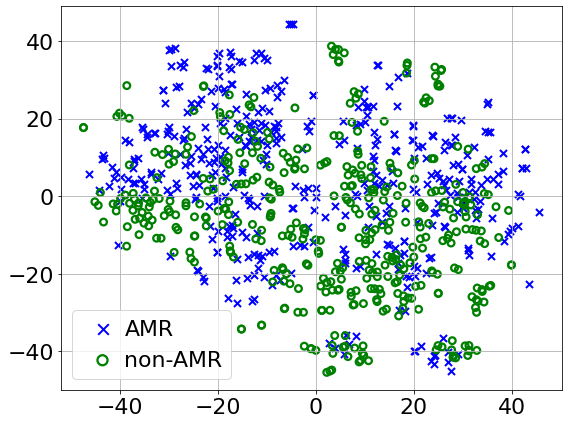

In [14]:
carpetas = ["S1", "S2", "S3", "S4", "S5"]
method = "PCA"
analysis_method = "FE"

more_analysis = False

##### Select the set of data to analyze
i = 1

print("==================================>" + carpetas[i] + "<=====================================")
####### begin load data
y_train = pd.read_csv('./Data/labels/' + carpetas[i] + '/y_train.csv')
X_train = pd.read_csv('./Data/' + analysis_method + '/' + method + '/X_train_' + carpetas[i] + '.csv')

print(X_train.shape)
print(y_train.shape)
#### end load data

###### begin df_TSNE
df_TSNE = utils.plotTSNE(X_train, y_train, 20)
# get admissiondboid
df_TSNE = utils.add_Adb(df_TSNE, carpetas[i])
##### end df_TSNE

if more_analysis:
    ##### CVIs to get the number of clusters
    results = utils.f_davies_bouldin_score(df_TSNE, X_train)
    number_of_clusters_DB = min(results, key=results.get)

    results = utils.f_silhouette_score(df_TSNE, X_train)
    number_of_clusters_SC = max(results, key=results.get)

    if number_of_clusters_DB == number_of_clusters_SC:
        n_cluster = number_of_clusters_SC
    else:
        print("=======> Number of different clusters")

    ##### end CVIs

    ##### add labels to TSNE
    df_TSNE_with_sc_labels = utils.f_sc(df_TSNE, X_train, n_cluster)
    ##### number of unique labels
    num_labels = len(np.unique(df_TSNE_with_sc_labels.labels))

    ###### begin cluster analysis
    for i in range(num_labels):
        print(" <============ Cluster analysis ============>")
        utils.analysisCluster(df_TSNE_with_sc_labels, i, group)
    # ###### end cluster analysis

### Train set 2

==================================>S3<=====================================
(856, 85)
(856, 1)


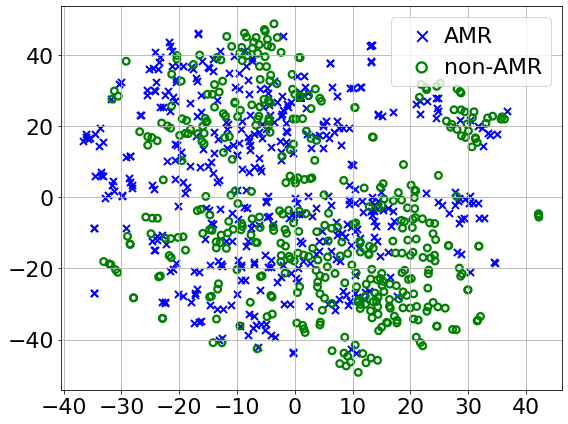

In [15]:
carpetas = ["S1", "S2", "S3", "S4", "S5"]
method = "PCA"
analysis_method = "FE"

more_analysis = False

##### Select the set of data to analyze
i = 2

print("==================================>" + carpetas[i] + "<=====================================")
####### begin load data
y_train = pd.read_csv('./Data/labels/' + carpetas[i] + '/y_train.csv')
X_train = pd.read_csv('./Data/' + analysis_method + '/' + method + '/X_train_' + carpetas[i] + '.csv')

print(X_train.shape)
print(y_train.shape)
#### end load data

###### begin df_TSNE
df_TSNE = utils.plotTSNE(X_train, y_train, 20)
# get admissiondboid
df_TSNE = utils.add_Adb(df_TSNE, carpetas[i])
##### end df_TSNE

if more_analysis:
    ##### CVIs to get the number of clusters
    results = utils.f_davies_bouldin_score(df_TSNE, X_train)
    number_of_clusters_DB = min(results, key=results.get)

    results = utils.f_silhouette_score(df_TSNE, X_train)
    number_of_clusters_SC = max(results, key=results.get)

    if number_of_clusters_DB == number_of_clusters_SC:
        n_cluster = number_of_clusters_SC
    else:
        print("=======> Number of different clusters")

    ##### end CVIs

    ##### add labels to TSNE
    df_TSNE_with_sc_labels = utils.f_sc(df_TSNE, X_train, n_cluster)
    ##### number of unique labels
    num_labels = len(np.unique(df_TSNE_with_sc_labels.labels))

    ###### begin cluster analysis
    for i in range(num_labels):
        print(" <============ Cluster analysis ============>")
        utils.analysisCluster(df_TSNE_with_sc_labels, i, group)
    # ###### end cluster analysis

### Train set 3

==================================>S4<=====================================
(866, 86)
(866, 1)


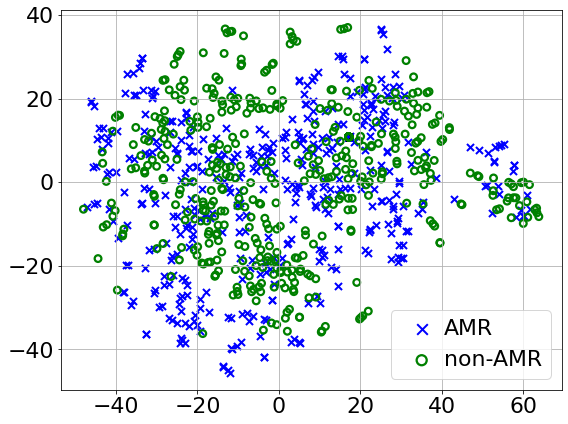

In [16]:
carpetas = ["S1", "S2", "S3", "S4", "S5"]
method = "PCA"
analysis_method = "FE"

more_analysis = False

##### Select the set of data to analyze
i = 3

print("==================================>" + carpetas[i] + "<=====================================")
####### begin load data
y_train = pd.read_csv('./Data/labels/' + carpetas[i] + '/y_train.csv')
X_train = pd.read_csv('./Data/' + analysis_method + '/' + method + '/X_train_' + carpetas[i] + '.csv')

print(X_train.shape)
print(y_train.shape)
#### end load data

###### begin df_TSNE
df_TSNE = utils.plotTSNE(X_train, y_train, 20)
# get admissiondboid
df_TSNE = utils.add_Adb(df_TSNE, carpetas[i])
##### end df_TSNE

if more_analysis:
    ##### CVIs to get the number of clusters
    results = utils.f_davies_bouldin_score(df_TSNE, X_train)
    number_of_clusters_DB = min(results, key=results.get)

    results = utils.f_silhouette_score(df_TSNE, X_train)
    number_of_clusters_SC = max(results, key=results.get)

    if number_of_clusters_DB == number_of_clusters_SC:
        n_cluster = number_of_clusters_SC
    else:
        print("=======> Number of different clusters")

    ##### end CVIs

    ##### add labels to TSNE
    df_TSNE_with_sc_labels = utils.f_sc(df_TSNE, X_train, n_cluster)
    ##### number of unique labels
    num_labels = len(np.unique(df_TSNE_with_sc_labels.labels))

    ###### begin cluster analysis
    for i in range(num_labels):
        print(" <============ Cluster analysis ============>")
        utils.analysisCluster(df_TSNE_with_sc_labels, i, group)
    # ###### end cluster analysis

### Train set 4

==================================>S5<=====================================
(846, 85)
(846, 1)


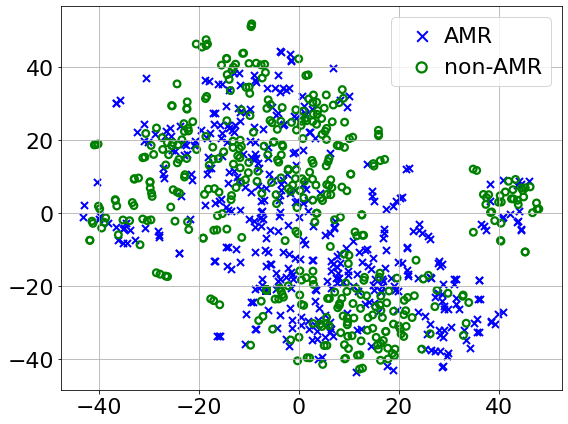

In [17]:
carpetas = ["S1", "S2", "S3", "S4", "S5"]
method = "PCA"
analysis_method = "FE"

more_analysis = False

##### Select the set of data to analyze
i = 4

print("==================================>" + carpetas[i] + "<=====================================")
####### begin load data
y_train = pd.read_csv('./Data/labels/' + carpetas[i] + '/y_train.csv')
X_train = pd.read_csv('./Data/' + analysis_method + '/' + method + '/X_train_' + carpetas[i] + '.csv')

print(X_train.shape)
print(y_train.shape)
#### end load data

###### begin df_TSNE
df_TSNE = utils.plotTSNE(X_train, y_train, 20)
# get admissiondboid
df_TSNE = utils.add_Adb(df_TSNE, carpetas[i])
##### end df_TSNE

if more_analysis:
    ##### CVIs to get the number of clusters
    results = utils.f_davies_bouldin_score(df_TSNE, X_train)
    number_of_clusters_DB = min(results, key=results.get)

    results = utils.f_silhouette_score(df_TSNE, X_train)
    number_of_clusters_SC = max(results, key=results.get)

    if number_of_clusters_DB == number_of_clusters_SC:
        n_cluster = number_of_clusters_SC
    else:
        print("=======> Number of different clusters")

    ##### end CVIs

    ##### add labels to TSNE
    df_TSNE_with_sc_labels = utils.f_sc(df_TSNE, X_train, n_cluster)
    ##### number of unique labels
    num_labels = len(np.unique(df_TSNE_with_sc_labels.labels))

    ###### begin cluster analysis
    for i in range(num_labels):
        print(" <============ Cluster analysis ============>")
        utils.analysisCluster(df_TSNE_with_sc_labels, i, group)
    # ###### end cluster analysis

## TCK + KPCA

### Train set 1

==================================>S1<=====================================
(842, 100)
(842, 1)


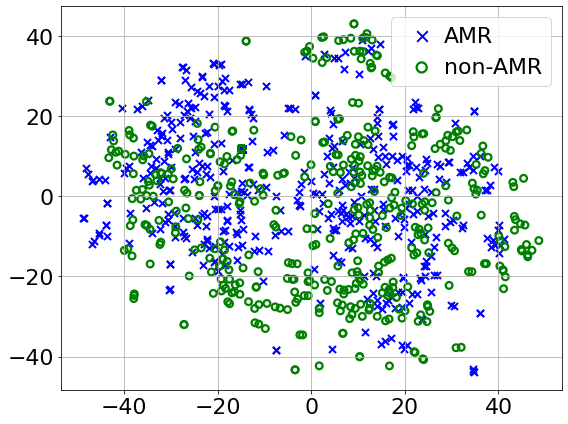

In [18]:
carpetas = ["S1", "S2", "S3", "S4", "S5"]
method = "KPCA"
analysis_method = "FE"

more_analysis = False

##### Select the set of data to analyze
i = 0

print("==================================>" + carpetas[i] + "<=====================================")
####### begin load data
y_train = pd.read_csv('./Data/labels/' + carpetas[i] + '/y_train.csv')
X_train = pd.read_csv('./Data/' + analysis_method + '/' + method + '/X_train_' + carpetas[i] + '.csv')

print(X_train.shape)
print(y_train.shape)
#### end load data

###### begin df_TSNE
df_TSNE = utils.plotTSNE(X_train, y_train, 20)
# get admissiondboid
df_TSNE = utils.add_Adb(df_TSNE, carpetas[i])
##### end df_TSNE

if more_analysis:
    ##### CVIs to get the number of clusters
    results = utils.f_davies_bouldin_score(df_TSNE, X_train)
    number_of_clusters_DB = min(results, key=results.get)

    results = utils.f_silhouette_score(df_TSNE, X_train)
    number_of_clusters_SC = max(results, key=results.get)

    if number_of_clusters_DB == number_of_clusters_SC:
        n_cluster = number_of_clusters_SC
    else:
        print("=======> Number of different clusters")

    ##### end CVIs

    ##### add labels to TSNE
    df_TSNE_with_sc_labels = utils.f_sc(df_TSNE, X_train, n_cluster)
    ##### number of unique labels
    num_labels = len(np.unique(df_TSNE_with_sc_labels.labels))

    ###### begin cluster analysis
    for i in range(num_labels):
        print(" <============ Cluster analysis ============>")
        utils.analysisCluster(df_TSNE_with_sc_labels, i, group)
    # ###### end cluster analysis

### Train set 1

==================================>S2<=====================================
(852, 100)
(852, 1)


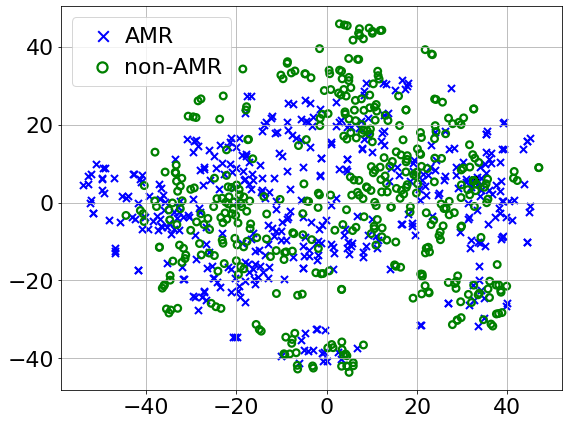

In [19]:
carpetas = ["S1", "S2", "S3", "S4", "S5"]
method = "KPCA"
analysis_method = "FE"

more_analysis = False

##### Select the set of data to analyze
i = 1

print("==================================>" + carpetas[i] + "<=====================================")
####### begin load data
y_train = pd.read_csv('./Data/labels/' + carpetas[i] + '/y_train.csv')
X_train = pd.read_csv('./Data/' + analysis_method + '/' + method + '/X_train_' + carpetas[i] + '.csv')

print(X_train.shape)
print(y_train.shape)
#### end load data

###### begin df_TSNE
df_TSNE = utils.plotTSNE(X_train, y_train, 20)
# get admissiondboid
df_TSNE = utils.add_Adb(df_TSNE, carpetas[i])
##### end df_TSNE

if more_analysis:
    ##### CVIs to get the number of clusters
    results = utils.f_davies_bouldin_score(df_TSNE, X_train)
    number_of_clusters_DB = min(results, key=results.get)

    results = utils.f_silhouette_score(df_TSNE, X_train)
    number_of_clusters_SC = max(results, key=results.get)

    if number_of_clusters_DB == number_of_clusters_SC:
        n_cluster = number_of_clusters_SC
    else:
        print("=======> Number of different clusters")

    ##### end CVIs

    ##### add labels to TSNE
    df_TSNE_with_sc_labels = utils.f_sc(df_TSNE, X_train, n_cluster)
    ##### number of unique labels
    num_labels = len(np.unique(df_TSNE_with_sc_labels.labels))

    ###### begin cluster analysis
    for i in range(num_labels):
        print(" <============ Cluster analysis ============>")
        utils.analysisCluster(df_TSNE_with_sc_labels, i, group)
    # ###### end cluster analysis

### Train set 2

==================================>S3<=====================================
(856, 100)
(856, 1)


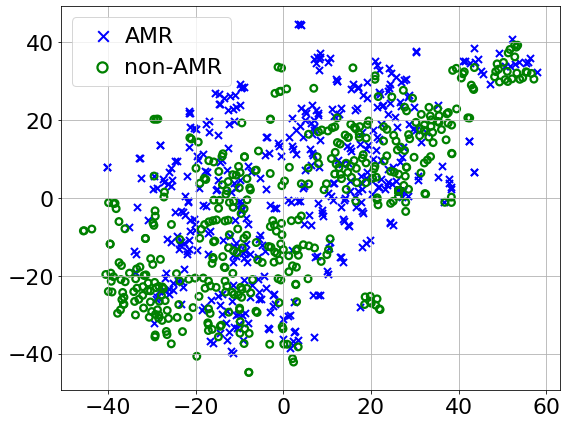

In [20]:
carpetas = ["S1", "S2", "S3", "S4", "S5"]
method = "KPCA"
analysis_method = "FE"

more_analysis = False

##### Select the set of data to analyze
i = 2

print("==================================>" + carpetas[i] + "<=====================================")
####### begin load data
y_train = pd.read_csv('./Data/labels/' + carpetas[i] + '/y_train.csv')
X_train = pd.read_csv('./Data/' + analysis_method + '/' + method + '/X_train_' + carpetas[i] + '.csv')

print(X_train.shape)
print(y_train.shape)
#### end load data

###### begin df_TSNE
df_TSNE = utils.plotTSNE(X_train, y_train, 20)
# get admissiondboid
df_TSNE = utils.add_Adb(df_TSNE, carpetas[i])
##### end df_TSNE

if more_analysis:
    ##### CVIs to get the number of clusters
    results = utils.f_davies_bouldin_score(df_TSNE, X_train)
    number_of_clusters_DB = min(results, key=results.get)

    results = utils.f_silhouette_score(df_TSNE, X_train)
    number_of_clusters_SC = max(results, key=results.get)

    if number_of_clusters_DB == number_of_clusters_SC:
        n_cluster = number_of_clusters_SC
    else:
        print("=======> Number of different clusters")

    ##### end CVIs

    ##### add labels to TSNE
    df_TSNE_with_sc_labels = utils.f_sc(df_TSNE, X_train, n_cluster)
    ##### number of unique labels
    num_labels = len(np.unique(df_TSNE_with_sc_labels.labels))

    ###### begin cluster analysis
    for i in range(num_labels):
        print(" <============ Cluster analysis ============>")
        utils.analysisCluster(df_TSNE_with_sc_labels, i, group)
    # ###### end cluster analysis

### Train set 3

==================================>S4<=====================================
(866, 100)
(866, 1)


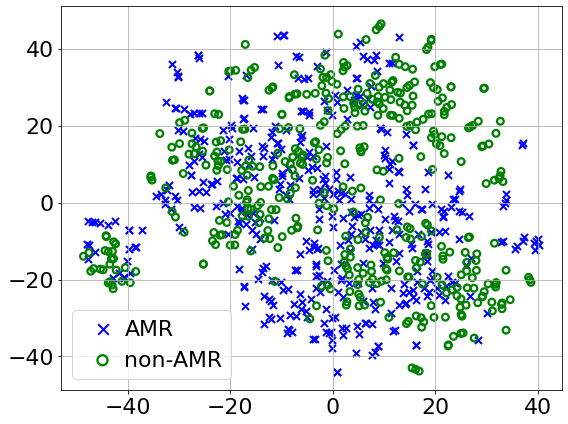

In [21]:
carpetas = ["S1", "S2", "S3", "S4", "S5"]
method = "KPCA"
analysis_method = "FE"

more_analysis = False

##### Select the set of data to analyze
i = 3

print("==================================>" + carpetas[i] + "<=====================================")
####### begin load data
y_train = pd.read_csv('./Data/labels/' + carpetas[i] + '/y_train.csv')
X_train = pd.read_csv('./Data/' + analysis_method + '/' + method + '/X_train_' + carpetas[i] + '.csv')

print(X_train.shape)
print(y_train.shape)
#### end load data

###### begin df_TSNE
df_TSNE = utils.plotTSNE(X_train, y_train, 20)
# get admissiondboid
df_TSNE = utils.add_Adb(df_TSNE, carpetas[i])
##### end df_TSNE

if more_analysis:
    ##### CVIs to get the number of clusters
    results = utils.f_davies_bouldin_score(df_TSNE, X_train)
    number_of_clusters_DB = min(results, key=results.get)

    results = utils.f_silhouette_score(df_TSNE, X_train)
    number_of_clusters_SC = max(results, key=results.get)

    if number_of_clusters_DB == number_of_clusters_SC:
        n_cluster = number_of_clusters_SC
    else:
        print("=======> Number of different clusters")

    ##### end CVIs

    ##### add labels to TSNE
    df_TSNE_with_sc_labels = utils.f_sc(df_TSNE, X_train, n_cluster)
    ##### number of unique labels
    num_labels = len(np.unique(df_TSNE_with_sc_labels.labels))

    ###### begin cluster analysis
    for i in range(num_labels):
        print(" <============ Cluster analysis ============>")
        utils.analysisCluster(df_TSNE_with_sc_labels, i, group)
    # ###### end cluster analysis

### Train set 4

==================================>S5<=====================================
(846, 100)
(846, 1)


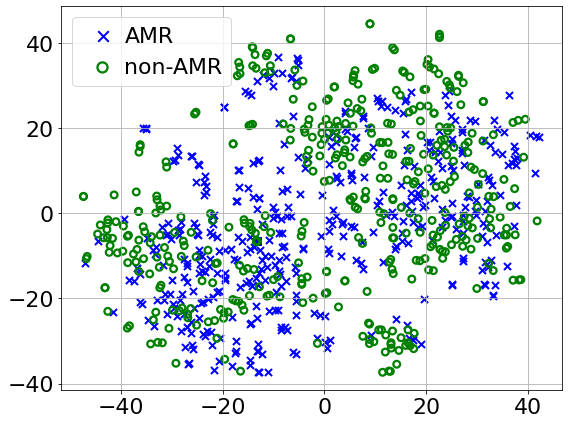

In [22]:
carpetas = ["S1", "S2", "S3", "S4", "S5"]
method = "KPCA"
analysis_method = "FE"

more_analysis = False

##### Select the set of data to analyze
i = 4

print("==================================>" + carpetas[i] + "<=====================================")
####### begin load data
y_train = pd.read_csv('./Data/labels/' + carpetas[i] + '/y_train.csv')
X_train = pd.read_csv('./Data/' + analysis_method + '/' + method + '/X_train_' + carpetas[i] + '.csv')

print(X_train.shape)
print(y_train.shape)
#### end load data

###### begin df_TSNE
df_TSNE = utils.plotTSNE(X_train, y_train, 20)
# get admissiondboid
df_TSNE = utils.add_Adb(df_TSNE, carpetas[i])
##### end df_TSNE

if more_analysis:
    ##### CVIs to get the number of clusters
    results = utils.f_davies_bouldin_score(df_TSNE, X_train)
    number_of_clusters_DB = min(results, key=results.get)

    results = utils.f_silhouette_score(df_TSNE, X_train)
    number_of_clusters_SC = max(results, key=results.get)

    if number_of_clusters_DB == number_of_clusters_SC:
        n_cluster = number_of_clusters_SC
    else:
        print("=======> Number of different clusters")

    ##### end CVIs

    ##### add labels to TSNE
    df_TSNE_with_sc_labels = utils.f_sc(df_TSNE, X_train, n_cluster)
    ##### number of unique labels
    num_labels = len(np.unique(df_TSNE_with_sc_labels.labels))

    ###### begin cluster analysis
    for i in range(num_labels):
        print(" <============ Cluster analysis ============>")
        utils.analysisCluster(df_TSNE_with_sc_labels, i, group)
    # ###### end cluster analysis